In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
import json
from sklearn import preprocessing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
import geopandas as gpd
sns.set_style("whitegrid")

In [3]:
solo_living = pd.read_csv('../scratchpad/wards_household_data.csv')

In [4]:
solo_living.head()

,Region code,Region name,County code,County name,Local authority code,Local authority name,Ward code,Ward name,Unnamed: 8,Persons,Persons.1,Persons.2,Unnamed: 12,Hectares,Persons per hectare,Unnamed: 15,Households,Persons per household
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,All usual residents,Household residents,Communal establishment residents,NaN,Area,Population density,NaN,Households with at least one usual resident,Average household size
1,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007955,Annfield Plain,NaN,"7,774","7,717",57,NaN,799,9.7,NaN,"3,522",2.2
2,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007956,Aycliffe East,NaN,"6,280","6,234",46,NaN,"1,336",4.7,NaN,"2,787",2.2
3,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007957,Aycliffe North,NaN,"7,751","7,611",140,NaN,337,23,NaN,"3,271",2.3
4,E12000001,NORTH EAST,NaN,NaN,E06000047,County Durham UA,E05007958,Aycliffe West,NaN,"7,457","7,457",0,NaN,288,25.9,NaN,"3,335",2.2


In [5]:
solo_living = solo_living.drop(solo_living.index[0])
solo_living.head()
solo_living['Persons per household'] = solo_living['Persons per household'].astype('float32')

In [6]:
len(solo_living)

8570

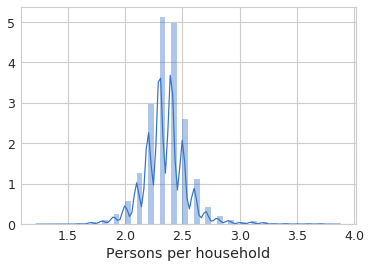

In [7]:
sns.distplot(solo_living['Persons per household'])

In [8]:
household_size = solo_living[['Ward code','Persons per household']].dropna()

In [9]:
data = pd.read_csv('All_data_aggregated_ward_level.csv')

In [13]:
# selected_ward_data= data[['GSS_CODE','WD17CD','GLUD_Area of Greenspace PCT','TreeScore',
#                           'depression_Prevalence','diabetes_Prevalence','h_nutrients_calories_norm',
#                           'avg_age','people_per_sq_km','third_places','All_jsa','Median 2012/13','bscore',
#                           'IMD','nature_tags_score','h_nutrients_weight_norm']].copy()
selected_ward_data= data[['GSS_CODE','WD17CD','GLUD_Area of Greenspace PCT','TreeScore',
                          'depression_Prevalence','diabetes_Prevalence','h_nutrients_calories_norm',
                          'avg_age','people_per_sq_km','third_places','All_jsa','Median 2012/13',
                          'IMD','h_nutrients_weight_norm']].copy()

In [14]:
list(data.columns)

['Unnamed: 0',
 'Unnamed: 0_x',
 'green_score',
 'GSS_CODE',
 'WD17CD',
 'GLUD_Area of Greenspace PCT',
 'LCM_grass_pct',
 'LCM_tree_pct',
 'LCM_urban_pct',
 'UA_Public Greenery PCT',
 'UA_Forests PCT',
 'StreetTrees_PCT',
 'Unnamed: 0.1',
 'borough_name_x',
 'poly',
 'area_m',
 'area_km',
 'gsview_point_list',
 'gsview_segnet_tags_dict',
 'gsview_tags',
 'total_gsview_pixels',
 'Tree',
 'TreeTotal',
 'TreeScore',
 'psoriasis_Prescriptions',
 'psoriasis_Prevalence',
 "Meniere's disease_Prescriptions",
 "Meniere's disease_Prevalence",
 "crohn's disease_Prescriptions",
 "crohn's disease_Prevalence",
 'gastroparesis_Prescriptions',
 'gastroparesis_Prevalence',
 'irritable bowel syndrome_Prescriptions',
 'irritable bowel syndrome_Prevalence',
 'parkinson_Prescriptions',
 'parkinson_Prevalence',
 'sleep apnea_Prescriptions',
 'sleep apnea_Prevalence',
 'interstitial cystitis_Prescriptions',
 'interstitial cystitis_Prevalence',
 'bipolar_Prescriptions',
 'bipolar_Prevalence',
 'hypothyroidis

In [17]:
df = pd.read_csv('../scratchpad/Jan_clubcard2nutrients.csv.bz2', compression='bz2', header=0, sep=',', quotechar='"')

In [18]:
thresh_bottom_weight = np.mean(df['weight']) - 2*np.std(df['weight'])
thresh_top_weight = np.mean(df['weight']) + 2*np.std(df['weight'])

In [19]:
test = df[ (df['weight'] < 600) &  (df['weight'] > 100) ]
# test = df[ (df['weight'] < thresh_top_weight) & (df['weight'] > thresh_bottom_weight) ].copy()

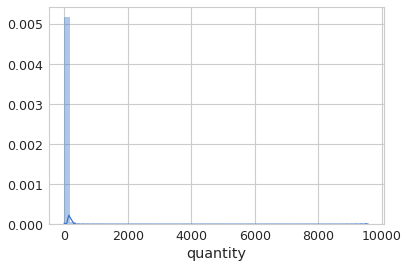

In [20]:
sns.distplot(test['quantity'])

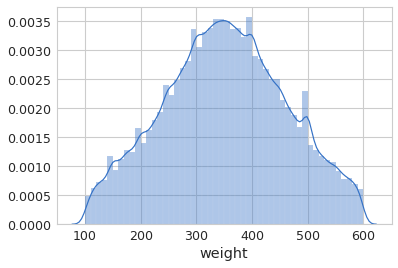

In [21]:
sns.distplot(test['weight'])

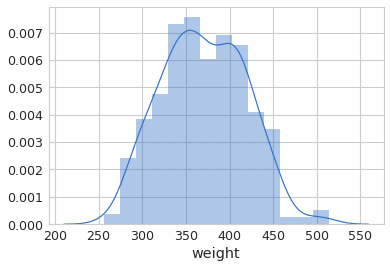

In [22]:
sns.distplot(data['weight'])

In [23]:
len(test)

754407

In [24]:
list(df.columns)

['pcd',
 'lat',
 'long',
 'oa11',
 'lsoa11',
 'msoa11',
 'osward',
 'oslaua',
 'clubcard_number',
 'weight',
 'volume',
 'energy_on_label',
 'g_fat',
 'g_saturate',
 'g_salt',
 'g_sugar',
 'g_protein',
 'g_carb',
 'g_fibre',
 'g_alcohol',
 'energy_fat',
 'energy_saturate',
 'energy_sugar',
 'energy_protein',
 'energy_carb',
 'energy_fibre',
 'energy_alcohol',
 'energy_tot',
 'f_energy_fat',
 'f_energy_saturate',
 'f_energy_sugar',
 'f_energy_protein',
 'f_energy_carb',
 'f_energy_fibre',
 'f_energy_alcohol',
 'hdi_fat',
 'hdi_saturate',
 'hdi_carb',
 'hdi_protein',
 'hdi_sugar',
 'energy_density',
 'h_nutrients_weight',
 'h_nutrients_weight_norm',
 'h_nutrients_calories',
 'h_nutrients_calories_norm',
 'beer_items',
 'dairy_items',
 'eggs_items',
 'fats_oils_items',
 'fish_items',
 'fruit_veg_items',
 'grains_items',
 'meat_red_items',
 'poultry_items',
 'readymade_items',
 'sauces_items',
 'soft_drinks_items',
 'spirits_items',
 'sweets_items',
 'tea_coffee_items',
 'water_items',
 'w

In [25]:
# household_individual = {'CardID':[] , 'WardCode': []  , 'h_nutrients_calories_norm' :[] , 'weight' : [] , 'volume':[]}
# for name, group in df.groupby('clubcard_number'):
#     household_individual['CardID'].append(name)
#     household_individual['WardCode'].append(group.iloc[0]['osward'])
#     household_individual['h_nutrients_calories_norm'].append(np.sum(group['h_nutrients_calories_norm']))
#     household_individual['weight'].append(np.sum(group['weight']))
#     household_individual['volume'].append(np.sum(group['volume']))
# Tesco = pd.Dataframe.from_dict(household_individual)
   

In [26]:
nutrient  = [
 'h_items_norm',
 'h_items_weight_norm',
 'h_nutrients_calories_norm']
Tesco = test[['clubcard_number','h_nutrients_calories_norm', 'volume','osward','f_energy_alcohol' , 'h_items_norm' , 'h_items_weight_norm']].copy()
Tesco = Tesco.dropna()
features_to_normalize = ['h_nutrients_calories_norm','h_items_norm','h_items_weight_norm']
Tesco[features_to_normalize] = Tesco[features_to_normalize].apply(lambda x:(x-x.min()) / (x.max()-x.min()))

In [28]:
Tesco['Household'] =  0.7321  + 0.2529*Tesco['h_items_weight_norm'] - 0.7391*Tesco['h_nutrients_calories_norm']
# Tesco['Household'] =  3.2294 + 0.5422*Tesco['weight'] -1.3654*Tesco['h_nutrients_calories_norm']
# Tesco['Household'] =  3.2294 + 0.5422*Tesco['weight'] -1.3654*Tesco['h_nutrients_calories_norm']
# Tesco['Household'] =  0.7344 - 0.4772*Tesco['f_energy_alcohol'] + 0.4570*Tesco['h_items_norm'] -0.6621*Tesco['h_items_weight_norm']

# Tesco['Household'] =  0.9230 + 0.3245*Tesco['h_items_norm'] -0.4821*Tesco['h_items_weight_norm'] -0.5849*Tesco['h_nutrients_calories_norm']

In [29]:
Tesco['Household']

0         0.399687
1         0.294267
2         0.259898
3         0.418500
4         0.337581
            ...   
886978    0.323748
886980    0.546540
886981    0.298411
886982    0.400876
886983    0.333444
Name: Household, Length: 754111, dtype: float64

In [30]:
thresh_bottom_household = np.mean(Tesco['Household']) - 2*np.std(Tesco['Household'])
thresh_top_household = np.mean(Tesco['Household']) + 2*np.std(Tesco['Household'])

Tesco_filtered = Tesco[ (Tesco['Household'] > thresh_bottom_household) &  (Tesco['Household'] < thresh_top_household) ].copy()

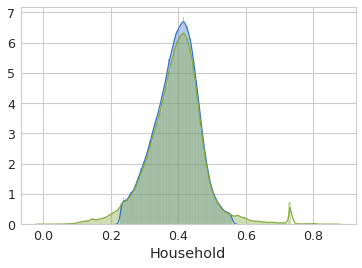

In [31]:
sns.distplot(Tesco_filtered['Household'],bins=100)
sns.distplot(Tesco['Household'],bins=100)

In [33]:
Thresh  = np.min(Tesco_filtered['Household']) +  0.45 * (np.max(Tesco_filtered['Household']) - np.min(Tesco_filtered['Household']))
print(Thresh)

0.3775004192601844


In [34]:
def solo(x):
    if x<= Thresh:
        return 1
    else:
        return 0 
Tesco_filtered['solo'] = Tesco_filtered['Household'].apply(lambda x: solo(x))

In [35]:
np.sum(Tesco_filtered['solo'])

266256

In [36]:
np.sum(Tesco_filtered['solo'])/len(Tesco_filtered)

0.373759777195061

In [37]:
Ward_level_estimate = {'WardCode':[] , 'Household':[]}
for name , group in Tesco_filtered.groupby('osward'):
    Ward_level_estimate['WardCode'].append(name)
    soloHouses = np.sum(group['solo'])
    fraction = float(soloHouses)/ len(group)
    Ward_level_estimate['Household'].append(fraction)
Ward_estimates = pd.DataFrame.from_dict(Ward_level_estimate)

In [38]:
len(Ward_estimates)

658

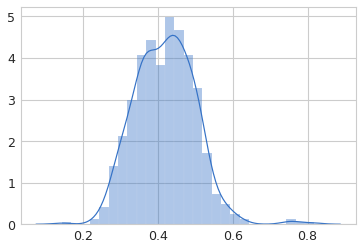

In [39]:
sns.distplot(Ward_level_estimate['Household'])

In [40]:
%store Ward_estimates

Stored 'Ward_estimates' (DataFrame)


In [42]:
wards_shape = gpd.read_file('../../Data/Geo_Data/geo/london_wards.shp')
wards_shape.head()

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,geometry
0,Chessington South Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,52,733,50840,10884,E05000405,755.173,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.33068 51.32901, -0.33059 51.32909..."
1,Tolworth and Hook Rise Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,106,734,117160,11407,E05000414,259.464,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.30846 51.37586, -0.30834 51.37606..."
2,Berrylands Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,107,735,50449,11413,E05000401,145.390,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.30385 51.39249, -0.30375 51.39252..."
3,Alexandra Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,108,736,50456,11420,E05000400,268.506,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.26990 51.38845, -0.26975 51.38838..."
4,Beverley Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,109,737,117161,11417,E05000402,187.821,0.0,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.24662 51.39921, -0.24672 51.39921..."


In [43]:
solo_shape = pd.merge(wards_shape , Ward_estimates , left_on='CODE' , right_on='WardCode')

In [44]:
len(solo_shape)

508

In [45]:
islingtonWards = ['E05000366',
 'E05000367',
 'E05000368',
 'E05000369',
 'E05000370',
 'E05000371',
 'E05000372',
 'E05000373',
 'E05000374',
 'E05000375',
 'E05000376',
 'E05000377',
 'E05000378',
 'E05000379',
 'E05000380',
 'E05000381']

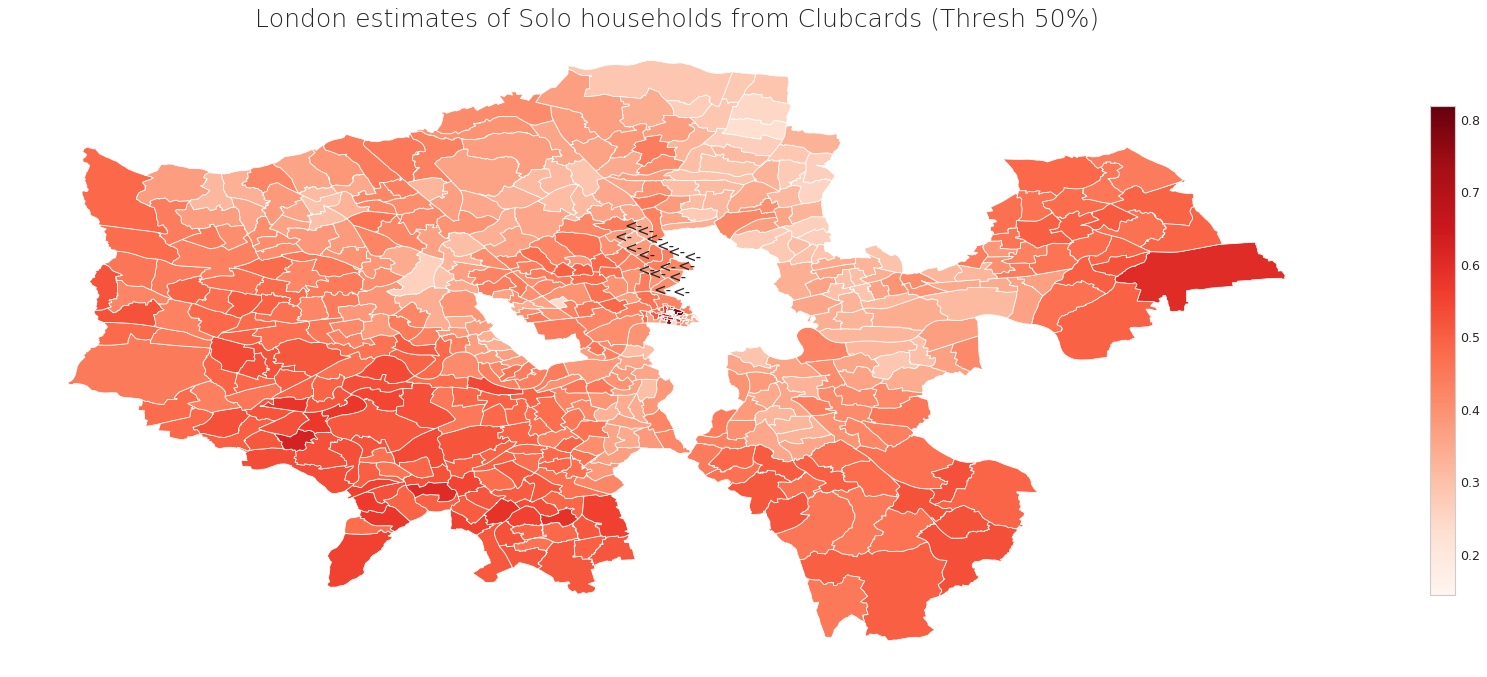

In [46]:
fig, ax = plt.subplots()
fig.set_size_inches(30,30)
ax.axis('off')
ax.set_title('London estimates of Solo households from Clubcards (Thresh 50%)', fontdict={'fontsize': '25', 'fontweight' : '5'})
sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=solo_shape['Household'].min(), vmax=solo_shape['Household'].max()))
#empty array for the data range
sm._A = []
#add the colorbar to the figure
cbar = fig.colorbar(sm,shrink=0.3)
solo_shape.plot(ax=ax,column='Household', cmap='Reds', linewidth=0.8)


islington = solo_shape[solo_shape['CODE'].isin(islingtonWards)]
for x, y, label in zip(islington.geometry.centroid.x, islington.geometry.centroid.y, islington.NAME):
    ax.annotate('<-', xy=(x, y), xytext=(5, 5), textcoords="offset points",fontsize = 15)
# lowest = solo_shape[:5]
# highest = solo_shape[-5:]
# for x, y, label in zip(lowest.geometry.centroid.x, lowest.geometry.centroid.y, lowest.NAME):
#     ax.annotate(label, xy=(x, y), xytext=(5, 5), textcoords="offset points",fontsize = 15)
# for x, y, label in zip(highest.geometry.centroid.x, highest.geometry.centroid.y, highest.NAME):
#     ax.annotate(label, xy=(x, y), xytext=(5, 5), textcoords="offset points",fontsize = 15)

In [47]:
islington[['NAME','Household']]

,NAME,Household
411,Clerkenwell Ward,0.464286
412,Caledonian Ward,0.393851
413,St. Mary's Ward,0.388786
414,Holloway Ward,0.421751
415,Highbury East Ward,0.433744
416,Highbury West Ward,0.440953
417,Tollington Ward,0.332773
418,Bunhill Ward,0.426328
419,St. Peter's Ward,0.410684
420,Canonbury Ward,0.397324


In [48]:
solo_shape = solo_shape.sort_values(by='Household')

In [49]:
solo_shape

,NAME,AREA_CODE,DESCRIPTIO,FILE_NAME,NUMBER,NUMBER0,POLYGON_ID,UNIT_ID,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,geometry,WardCode,Household
495,Bassishaw Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,718,1446,122519,11102,E05009290,10.658,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.09107 51.51541, -0.09190 51.51543...",E05009290,0.142857
250,Ponders End Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,284,1089,117081,11307,E05000206,354.296,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.01479 51.63673, -0.01587 51.63703...",E05000206,0.232254
392,Church Street Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,685,1291,50567,11355,E05000634,44.269,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.17685 51.52462, -0.17457 51.52576...",E05000634,0.239130
251,Enfield Highway Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,285,1090,117082,11306,E05000198,463.653,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.01186 51.64885, -0.01304 51.64905...",E05000198,0.246696
497,Dowgate Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,720,1448,122509,11091,E05009303,9.568,2.507,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.09265 51.50851, -0.09199 51.50940...",E05009303,0.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
310,Fulwell and Hampton Hill Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,296,1179,51128,11479,E05000518,191.772,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.35254 51.42052, -0.35264 51.42088...",E05000518,0.626582
492,Cordwainer Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,715,1443,122507,11092,E05009300,5.965,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.09075 51.51169, -0.09077 51.51170...",E05009300,0.750000
491,Vintry Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,714,1442,122510,10981,E05009311,10.401,2.406,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.09265 51.50851, -0.09282 51.50855...",E05009311,0.750000
505,Coleman Street Ward,LBW,London Borough Ward,GREATER_LONDON_AUTHORITY,728,1456,122520,11101,E05009299,15.061,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.08623 51.51881, -0.08618 51.51879...",E05009299,0.777778


In [50]:
solo_shape[-10:][['NAME','Household']]

,NAME,Household
81,Upminster Ward,0.599291
493,Bread Street Ward,0.600000
507,Candlewick Ward,0.600000
14,St. James Ward,0.602740
494,Cheap Ward,0.625000
310,Fulwell and Hampton Hill Ward,0.626582
492,Cordwainer Ward,0.750000
491,Vintry Ward,0.750000
505,Coleman Street Ward,0.777778
504,Broad Street Ward,0.818182


In [51]:
selected_ward_data.head()

,GSS_CODE,WD17CD,GLUD_Area of Greenspace PCT,TreeScore,depression_Prevalence,diabetes_Prevalence,h_nutrients_calories_norm,avg_age,people_per_sq_km,third_places,All_jsa,Median 2012/13,IMD,h_nutrients_weight_norm
0,E05000420,E05000420,0.142967,9.871684,6.101268,2.343697,0.675817,33.195192,14246.666667,0.049544,0.557674,32220,8.91957,0.712779
1,E05000571,E05000571,0.391747,5.046705,7.252199,2.112096,0.671743,34.208704,5918.048780,0.031734,0.530168,32330,41.70052,0.707125
2,E05000570,E05000570,0.112290,7.005457,10.405727,1.825710,0.669696,40.219281,6259.883721,0.048017,0.509148,37960,18.26981,0.705212
3,E05000572,E05000572,0.254884,3.520658,5.299971,1.310541,0.670163,37.033810,6597.948718,0.030468,0.510026,40610,27.56138,0.697350
4,E05000620,E05000620,0.273367,2.648444,6.774973,1.564516,0.689372,35.017963,6087.197232,0.059004,0.618008,39580,41.44914,0.729214


In [52]:
Data = pd.merge(selected_ward_data , solo_shape , left_on='GSS_CODE' , right_on='CODE')

In [53]:
Data

,GSS_CODE,WD17CD,GLUD_Area of Greenspace PCT,TreeScore,depression_Prevalence,diabetes_Prevalence,h_nutrients_calories_norm,avg_age,people_per_sq_km,third_places,...,CODE,HECTARES,AREA,TYPE_CODE,DESCRIPT0,TYPE_COD0,DESCRIPT1,geometry,WardCode,Household
0,E05000420,E05000420,0.142967,9.871684,6.101268,2.343697,0.675817,33.195192,14246.666667,0.049544,...,E05000420,120.806,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.11398 51.45580, -0.11435 51.45668...",E05000420,0.304083
1,E05000571,E05000571,0.391747,5.046705,7.252199,2.112096,0.671743,34.208704,5918.048780,0.031734,...,E05000571,205.369,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.15397 51.37733, -0.15408 51.37702...",E05000571,0.487365
2,E05000570,E05000570,0.112290,7.005457,10.405727,1.825710,0.669696,40.219281,6259.883721,0.048017,...,E05000570,171.798,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.15636 51.35910, -0.15557 51.35924...",E05000570,0.496732
3,E05000572,E05000572,0.254884,3.520658,5.299971,1.310541,0.670163,37.033810,6597.948718,0.030468,...,E05000572,195.703,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.21814 51.38015, -0.21879 51.37956...",E05000572,0.502128
4,E05000620,E05000620,0.273367,2.648444,6.774973,1.564516,0.689372,35.017963,6087.197232,0.059004,...,E05000620,320.486,31.244,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.13066 51.48020, -0.13085 51.47994...",E05000620,0.381009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,E05000257,E05000257,0.102392,10.825650,8.020765,1.815177,0.695945,34.873376,17501.612903,0.034743,...,E05000257,62.427,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.21812 51.48138, -0.21712 51.48166...",E05000257,0.421541
420,E05000314,E05000314,0.532996,2.924777,6.382871,1.817651,0.667029,37.183053,4068.421053,0.022280,...,E05000314,341.564,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((0.22171 51.60031, 0.22146 51.59999, ...",E05000314,0.453608
421,E05000438,E05000438,0.352056,11.374595,6.430066,1.994264,0.689841,36.385775,6318.025751,0.038584,...,E05000438,231.823,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.01313 51.46894, -0.01347 51.46938...",E05000438,0.329556
422,E05000439,E05000439,0.147625,7.031204,6.405030,2.065458,0.685962,33.045786,10881.656805,0.030179,...,E05000439,168.183,0.000,VA,CIVIL VOTING AREA,None,None,"POLYGON ((-0.03833 51.46172, -0.03829 51.46182...",E05000439,0.380034


In [54]:
Data['Solo_area'] = pd.qcut(Data['Household'], 3, labels=["low_solo", '' ,"high_solo"])

Text(0, 0.5, 'Frequency')

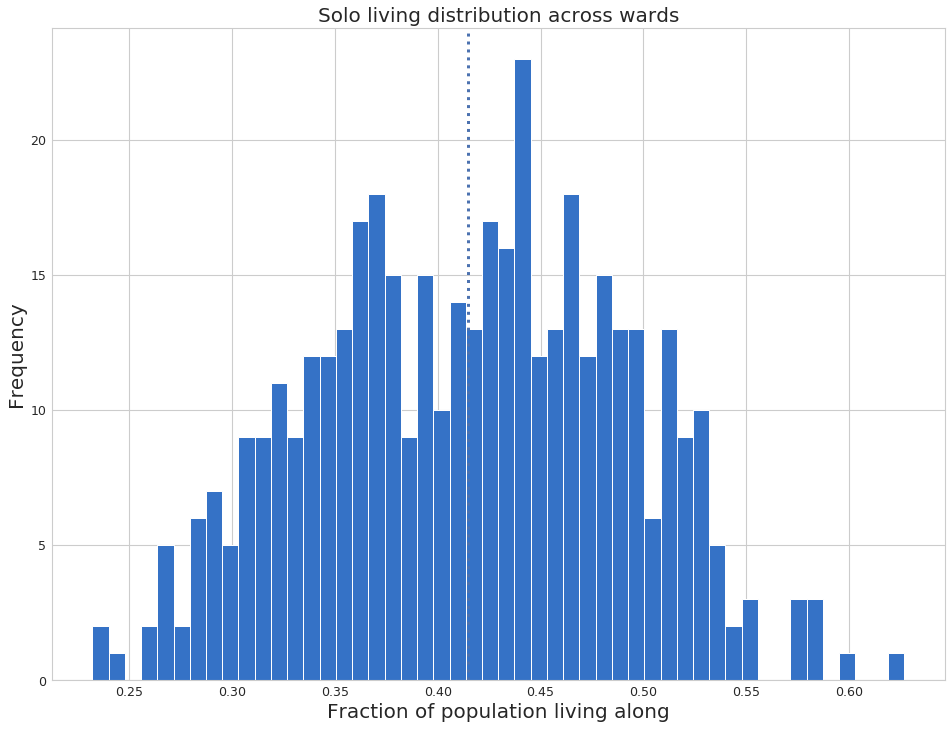

In [55]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(16,12)
sns.set(font_scale=2)
# sns.distplot(Data['Household'] ,kde_kws={"color": "b", "lw": 2, "label": "Solo living distribution"},bins=50,kde=True)
plt.hist(Data['Household'],bins=50)
ax.axvline(x=np.mean(Data['Household']), ymin=0, ymax=1, linewidth=3, color = 'b', linestyle='dotted')
plt.title("Solo living distribution across wards" , fontsize = 20)
plt.xlabel("Fraction of population living along" , fontsize = 20)
plt.ylabel("Frequency" , fontsize = 20 )

In [56]:
['GSS_CODE','WD17CD','GLUD_Area of Greenspace PCT','TreeScore',
                          'depression_Prescriptions','diabetes_Prevalence','h_nutrients_calories_norm',
                          'avg_age','people_per_sq_km','third_places','All_jsa','Median 2012/13','bscore',
                          'IMD','nature_tags_score']

['GSS_CODE',
 'WD17CD',
 'GLUD_Area of Greenspace PCT',
 'TreeScore',
 'depression_Prescriptions',
 'diabetes_Prevalence',
 'h_nutrients_calories_norm',
 'avg_age',
 'people_per_sq_km',
 'third_places',
 'All_jsa',
 'Median 2012/13',
 'bscore',
 'IMD',
 'nature_tags_score']

Text(0, 0.5, 'Frequency')

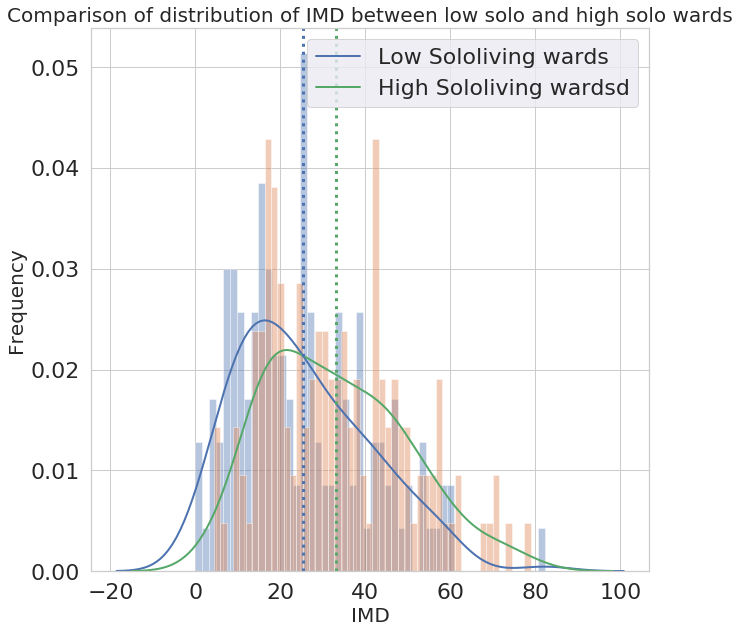

In [57]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.set(font_scale=2)
low_vals = Data[Data['Solo_area'] == 'low_solo']['IMD']
high_vals = Data[Data['Solo_area'] == 'high_solo']['IMD']
sns.distplot(low_vals ,kde_kws={"color": "b", "lw": 2, "label": "Low Sololiving wards"},bins=50,norm_hist=True)
sns.distplot(high_vals , kde_kws={"color": "g", "lw": 2, "label": "High Sololiving wardsd"},bins=50,norm_hist=True)
ax.axvline(x=np.mean(low_vals), ymin=0, ymax=1, linewidth=3, color = 'b', linestyle='dotted')
ax.axvline(x=np.mean(high_vals), ymin=0, ymax=1, linewidth=3, color = 'g', linestyle='dotted')
plt.title("Comparison of distribution of IMD between low solo and high solo wards" , fontsize = 20)
plt.xlabel("IMD" , fontsize = 20)
plt.ylabel("Frequency" , fontsize = 20 )

Text(0, 0.5, 'Frequency')

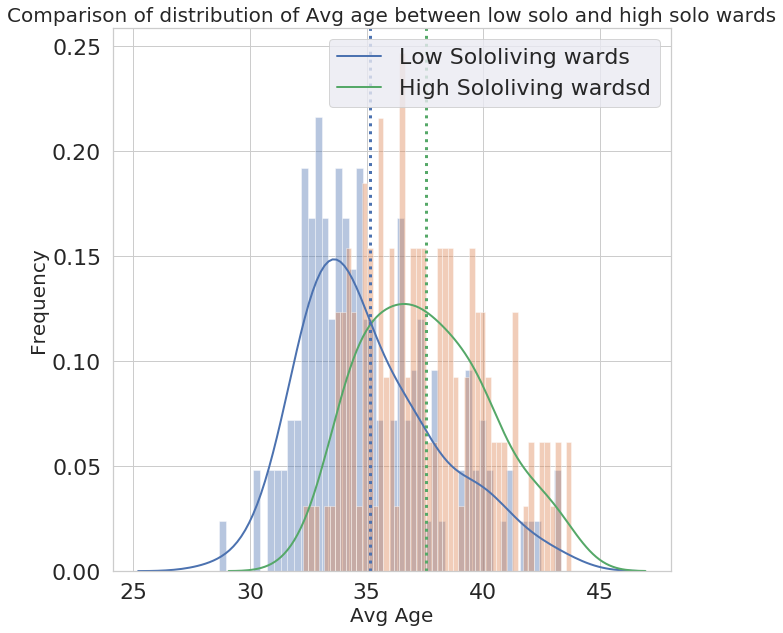

In [58]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.set(font_scale=2)
low_vals = Data[Data['Solo_area'] == 'low_solo']['avg_age']
high_vals = Data[Data['Solo_area'] == 'high_solo']['avg_age']
sns.distplot(low_vals ,kde_kws={"color": "b", "lw": 2, "label": "Low Sololiving wards"},bins=50,norm_hist=True)
sns.distplot(high_vals , kde_kws={"color": "g", "lw": 2, "label": "High Sololiving wardsd"},bins=50,norm_hist=True)
ax.axvline(x=np.mean(low_vals), ymin=0, ymax=1, linewidth=3, color = 'b', linestyle='dotted')
ax.axvline(x=np.mean(high_vals), ymin=0, ymax=1, linewidth=3, color = 'g', linestyle='dotted')
plt.title("Comparison of distribution of Avg age between low solo and high solo wards" , fontsize = 20)
plt.xlabel("Avg Age" , fontsize = 20)
plt.ylabel("Frequency" , fontsize = 20 )

Text(0, 0.5, 'Frequency')

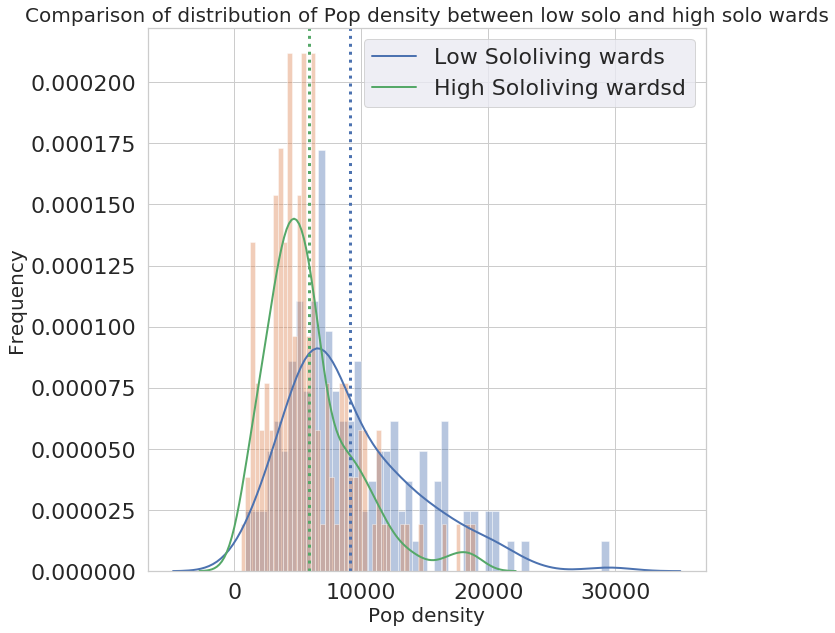

In [59]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.set(font_scale=2)
low_vals = Data[Data['Solo_area'] == 'low_solo']['people_per_sq_km']
high_vals = Data[Data['Solo_area'] == 'high_solo']['people_per_sq_km']
sns.distplot(low_vals ,kde_kws={"color": "b", "lw": 2, "label": "Low Sololiving wards"},bins=50,norm_hist=True)
sns.distplot(high_vals , kde_kws={"color": "g", "lw": 2, "label": "High Sololiving wardsd"},bins=50,norm_hist=True)
ax.axvline(x=np.mean(low_vals), ymin=0, ymax=1, linewidth=3, color = 'b', linestyle='dotted')
ax.axvline(x=np.mean(high_vals), ymin=0, ymax=1, linewidth=3, color = 'g', linestyle='dotted')
plt.title("Comparison of distribution of Pop density between low solo and high solo wards" , fontsize = 20)
plt.xlabel("Pop density" , fontsize = 20)
plt.ylabel("Frequency" , fontsize = 20 )

Text(0, 0.5, 'Frequency')

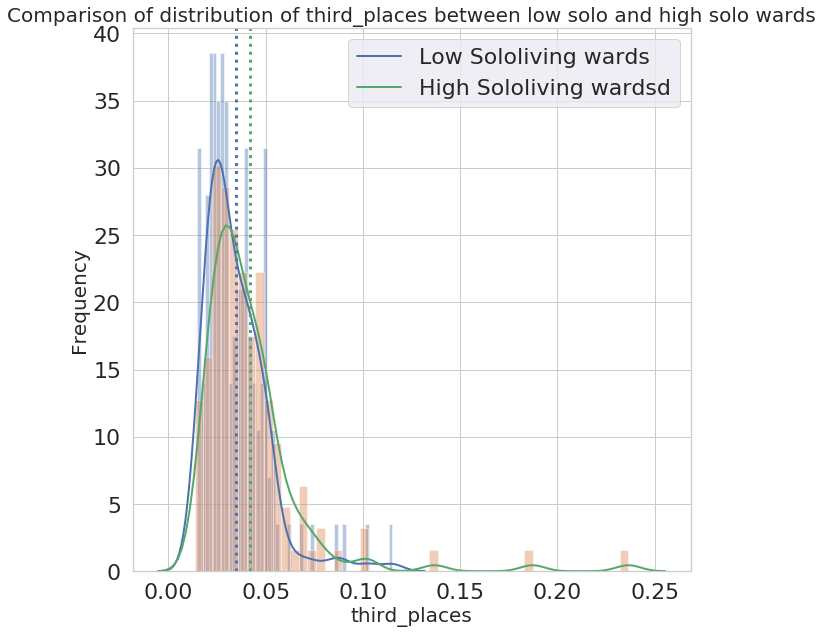

In [60]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.set(font_scale=2)
low_vals = Data[Data['Solo_area'] == 'low_solo']['third_places']
high_vals = Data[Data['Solo_area'] == 'high_solo']['third_places']
sns.distplot(low_vals ,kde_kws={"color": "b", "lw": 2, "label": "Low Sololiving wards"},bins=50,norm_hist=True)
sns.distplot(high_vals , kde_kws={"color": "g", "lw": 2, "label": "High Sololiving wardsd"},bins=50,norm_hist=True)
ax.axvline(x=np.mean(low_vals), ymin=0, ymax=1, linewidth=3, color = 'b', linestyle='dotted')
ax.axvline(x=np.mean(high_vals), ymin=0, ymax=1, linewidth=3, color = 'g', linestyle='dotted')
plt.title("Comparison of distribution of third_places between low solo and high solo wards" , fontsize = 20)
plt.xlabel("third_places" , fontsize = 20)
plt.ylabel("Frequency" , fontsize = 20 )

Text(0, 0.5, 'Frequency')

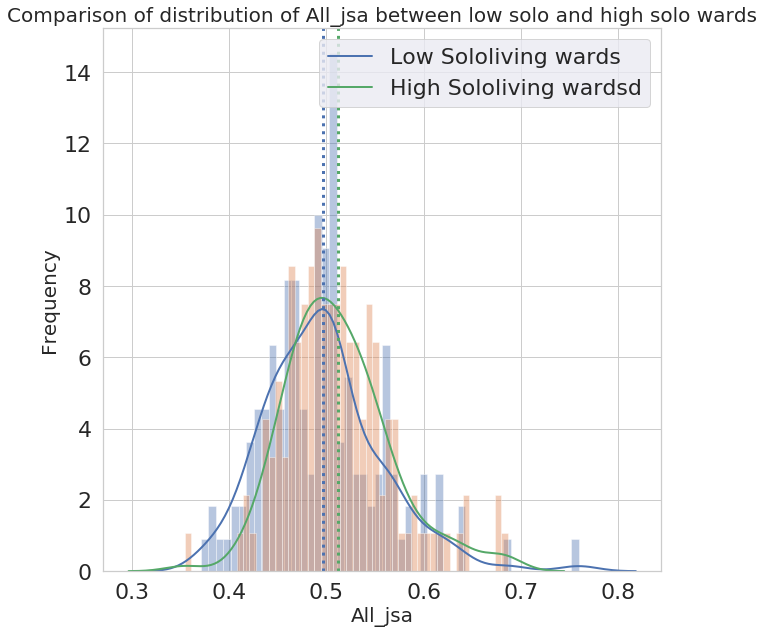

In [61]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.set(font_scale=2)
low_vals = Data[Data['Solo_area'] == 'low_solo']['All_jsa']
high_vals = Data[Data['Solo_area'] == 'high_solo']['All_jsa']
sns.distplot(low_vals ,kde_kws={"color": "b", "lw": 2, "label": "Low Sololiving wards"},bins=50,norm_hist=True)
sns.distplot(high_vals , kde_kws={"color": "g", "lw": 2, "label": "High Sololiving wardsd"},bins=50,norm_hist=True)
ax.axvline(x=np.mean(low_vals), ymin=0, ymax=1, linewidth=3, color = 'b', linestyle='dotted')
ax.axvline(x=np.mean(high_vals), ymin=0, ymax=1, linewidth=3, color = 'g', linestyle='dotted')
plt.title("Comparison of distribution of All_jsa between low solo and high solo wards" , fontsize = 20)
plt.xlabel("All_jsa" , fontsize = 20)
plt.ylabel("Frequency" , fontsize = 20 )

Text(0, 0.5, 'Frequency')

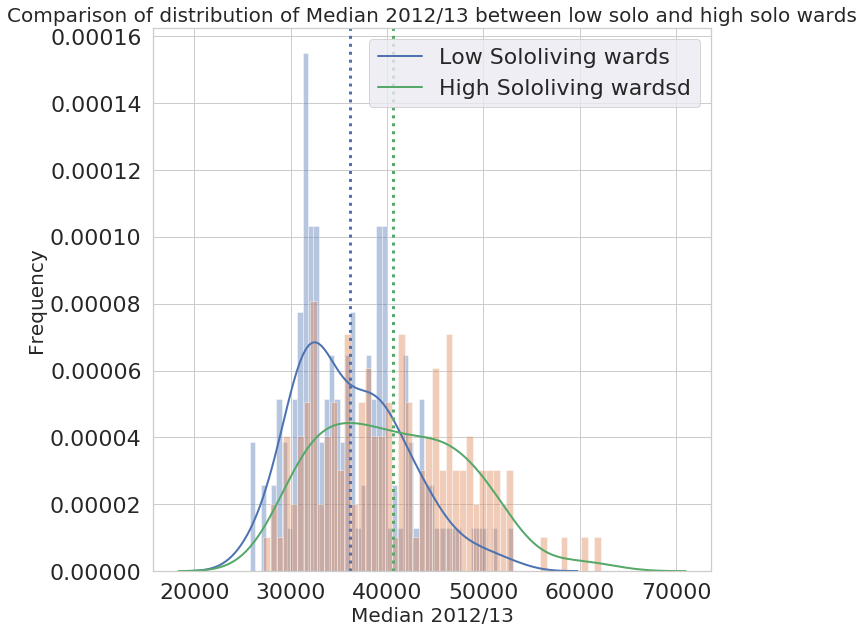

In [62]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.set(font_scale=2)
low_vals = Data[Data['Solo_area'] == 'low_solo']['Median 2012/13']
high_vals = Data[Data['Solo_area'] == 'high_solo']['Median 2012/13']
sns.distplot(low_vals ,kde_kws={"color": "b", "lw": 2, "label": "Low Sololiving wards"},bins=50,norm_hist=True)
sns.distplot(high_vals , kde_kws={"color": "g", "lw": 2, "label": "High Sololiving wardsd"},bins=50,norm_hist=True)
ax.axvline(x=np.mean(low_vals), ymin=0, ymax=1, linewidth=3, color = 'b', linestyle='dotted')
ax.axvline(x=np.mean(high_vals), ymin=0, ymax=1, linewidth=3, color = 'g', linestyle='dotted')
plt.title("Comparison of distribution of Median 2012/13 between low solo and high solo wards" , fontsize = 20)
plt.xlabel("Median 2012/13" , fontsize = 20)
plt.ylabel("Frequency" , fontsize = 20 )

In [64]:
# sns.set_style('whitegrid')
# fig, ax = plt.subplots()
# fig.set_size_inches(10,10)
# sns.set(font_scale=2)
# low_vals = Data[Data['Solo_area'] == 'low_solo']['bscore']
# high_vals = Data[Data['Solo_area'] == 'high_solo']['bscore']
# sns.distplot(low_vals ,kde_kws={"color": "b", "lw": 2, "label": "Low Sololiving wards"},bins=50,norm_hist=True)
# sns.distplot(high_vals , kde_kws={"color": "g", "lw": 2, "label": "High Sololiving wardsd"},bins=50,norm_hist=True)
# ax.axvline(x=np.mean(low_vals), ymin=0, ymax=1, linewidth=3, color = 'b', linestyle='dotted')
# ax.axvline(x=np.mean(high_vals), ymin=0, ymax=1, linewidth=3, color = 'g', linestyle='dotted')
# plt.title("Comparison of distribution of bscore between low solo and high solo wards" , fontsize = 20)
# plt.xlabel("bscore" , fontsize = 20)
# plt.ylabel("Frequency" , fontsize = 20 )

In [66]:
# sns.set_style('whitegrid')
# fig, ax = plt.subplots()
# fig.set_size_inches(10,10)
# sns.set(font_scale=2)
# low_vals = Data[Data['Solo_area'] == 'low_solo']['nature_tags_score']
# high_vals = Data[Data['Solo_area'] == 'high_solo']['nature_tags_score']
# sns.distplot(low_vals ,kde_kws={"color": "b", "lw": 2, "label": "Low Sololiving wards"},bins=50,norm_hist=True)
# sns.distplot(high_vals , kde_kws={"color": "g", "lw": 2, "label": "High Sololiving wardsd"},bins=50,norm_hist=True)
# ax.axvline(x=np.mean(low_vals), ymin=0, ymax=1, linewidth=3, color = 'b', linestyle='dotted')
# ax.axvline(x=np.mean(high_vals), ymin=0, ymax=1, linewidth=3, color = 'g', linestyle='dotted')
# plt.title("Comparison of distribution of nature_tags_score between low solo and high solo wards" , fontsize = 20)
# plt.xlabel("nature_tags_score" , fontsize = 20)
# plt.ylabel("Frequency" , fontsize = 20 )

Text(0, 0.5, 'Frequency')

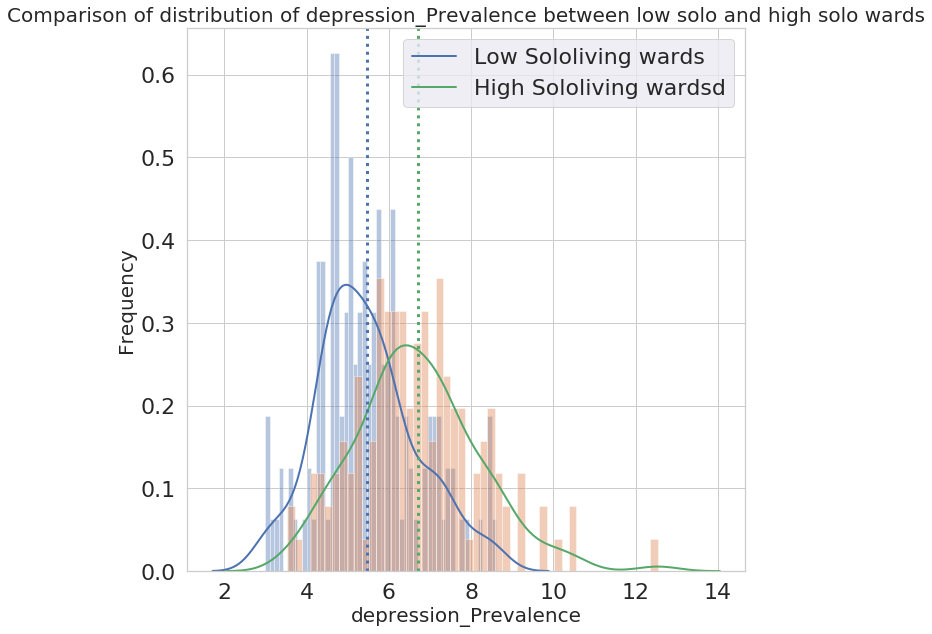

In [67]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.set(font_scale=2)
low_vals = Data[Data['Solo_area'] == 'low_solo']['depression_Prevalence']
high_vals = Data[Data['Solo_area'] == 'high_solo']['depression_Prevalence']
sns.distplot(low_vals ,kde_kws={"color": "b", "lw": 2, "label": "Low Sololiving wards"},bins=50,norm_hist=True)
sns.distplot(high_vals , kde_kws={"color": "g", "lw": 2, "label": "High Sololiving wardsd"},bins=50,norm_hist=True)
ax.axvline(x=np.mean(low_vals), ymin=0, ymax=1, linewidth=3, color = 'b', linestyle='dotted')
ax.axvline(x=np.mean(high_vals), ymin=0, ymax=1, linewidth=3, color = 'g', linestyle='dotted')
plt.title("Comparison of distribution of depression_Prevalence between low solo and high solo wards" , fontsize = 20)
plt.xlabel("depression_Prevalence" , fontsize = 20)
plt.ylabel("Frequency" , fontsize = 20 )

Text(0, 0.5, 'Frequency')

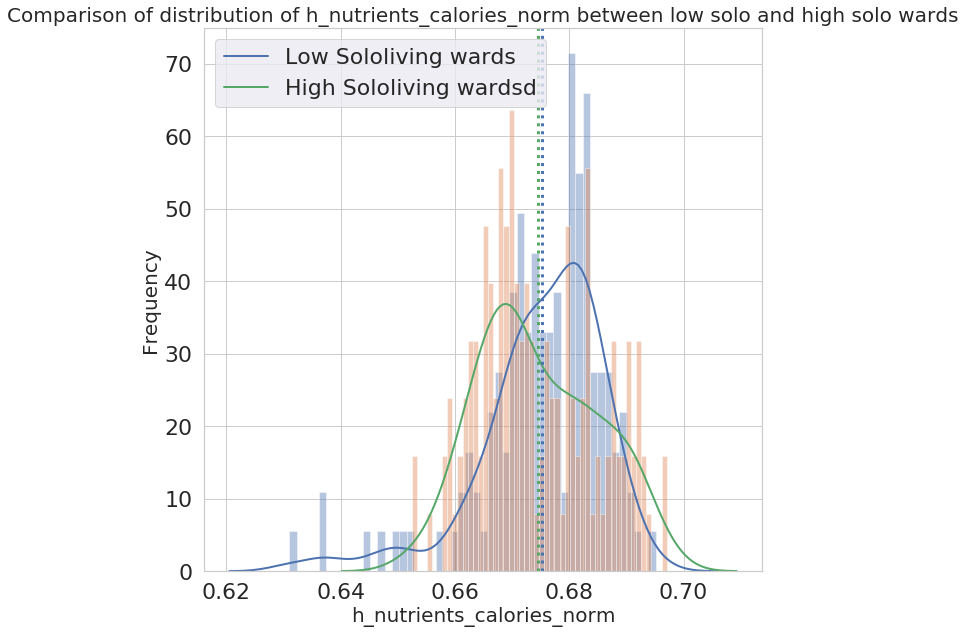

In [68]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.set(font_scale=2)
low_vals = Data[Data['Solo_area'] == 'low_solo']['h_nutrients_calories_norm']
high_vals = Data[Data['Solo_area'] == 'high_solo']['h_nutrients_calories_norm']
sns.distplot(low_vals ,kde_kws={"color": "b", "lw": 2, "label": "Low Sololiving wards"},bins=50,norm_hist=True)
sns.distplot(high_vals , kde_kws={"color": "g", "lw": 2, "label": "High Sololiving wardsd"},bins=50,norm_hist=True)
ax.axvline(x=np.mean(low_vals), ymin=0, ymax=1, linewidth=3, color = 'b', linestyle='dotted')
ax.axvline(x=np.mean(high_vals), ymin=0, ymax=1, linewidth=3, color = 'g', linestyle='dotted')
plt.title("Comparison of distribution of h_nutrients_calories_norm between low solo and high solo wards" , fontsize = 20)
plt.xlabel("h_nutrients_calories_norm" , fontsize = 20)
plt.ylabel("Frequency" , fontsize = 20 )

Text(0, 0.5, 'Frequency')

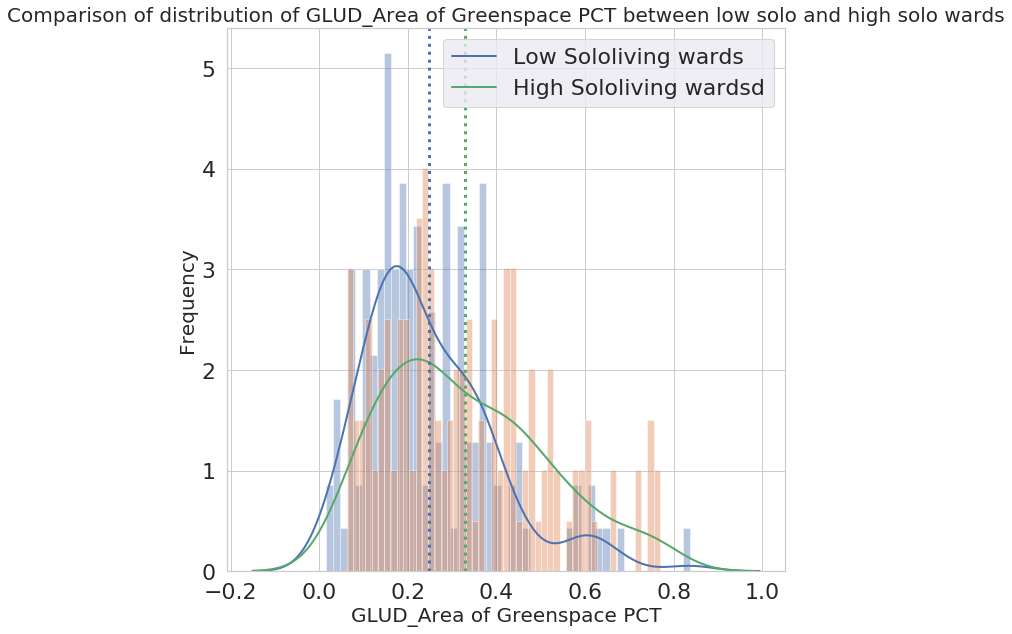

In [69]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.set(font_scale=2)
low_vals = Data[Data['Solo_area'] == 'low_solo']['GLUD_Area of Greenspace PCT']
high_vals = Data[Data['Solo_area'] == 'high_solo']['GLUD_Area of Greenspace PCT']
sns.distplot(low_vals ,kde_kws={"color": "b", "lw": 2, "label": "Low Sololiving wards"},bins=50,norm_hist=True)
sns.distplot(high_vals , kde_kws={"color": "g", "lw": 2, "label": "High Sololiving wardsd"},bins=50,norm_hist=True)
ax.axvline(x=np.mean(low_vals), ymin=0, ymax=1, linewidth=3, color = 'b', linestyle='dotted')
ax.axvline(x=np.mean(high_vals), ymin=0, ymax=1, linewidth=3, color = 'g', linestyle='dotted')
plt.title("Comparison of distribution of GLUD_Area of Greenspace PCT between low solo and high solo wards" , fontsize = 20)
plt.xlabel("GLUD_Area of Greenspace PCT" , fontsize = 20)
plt.ylabel("Frequency" , fontsize = 20 )

Text(0, 0.5, 'Frequency')

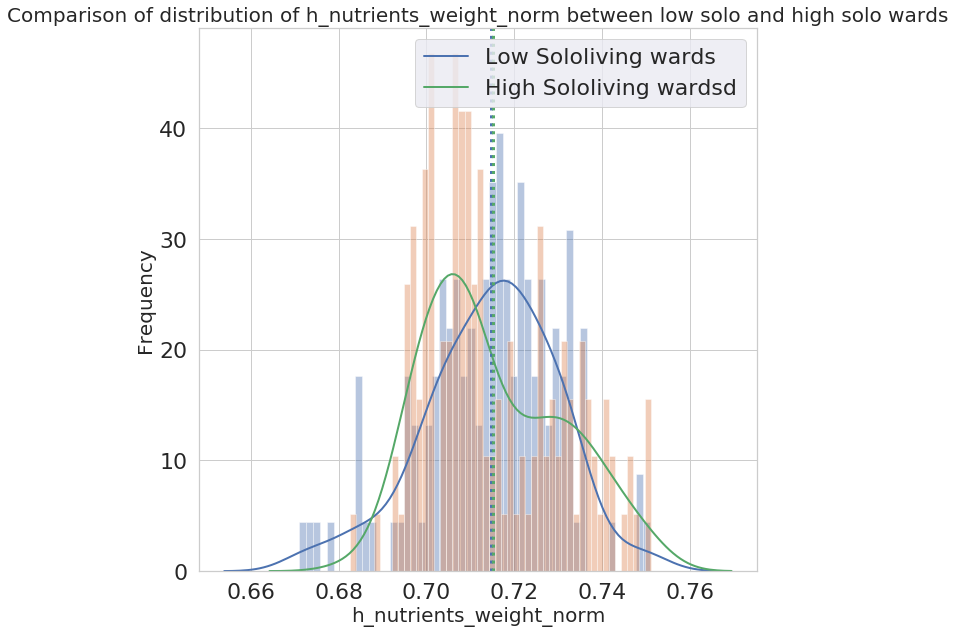

In [70]:
sns.set_style('whitegrid')
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.set(font_scale=2)
low_vals = Data[Data['Solo_area'] == 'low_solo']['h_nutrients_weight_norm']
high_vals = Data[Data['Solo_area'] == 'high_solo']['h_nutrients_weight_norm']
sns.distplot(low_vals ,kde_kws={"color": "b", "lw": 2, "label": "Low Sololiving wards"},bins=50,norm_hist=True)
sns.distplot(high_vals , kde_kws={"color": "g", "lw": 2, "label": "High Sololiving wardsd"},bins=50,norm_hist=True)
ax.axvline(x=np.mean(low_vals), ymin=0, ymax=1, linewidth=3, color = 'b', linestyle='dotted')
ax.axvline(x=np.mean(high_vals), ymin=0, ymax=1, linewidth=3, color = 'g', linestyle='dotted')
plt.title("Comparison of distribution of h_nutrients_weight_norm between low solo and high solo wards" , fontsize = 20)
plt.xlabel("h_nutrients_weight_norm" , fontsize = 20)
plt.ylabel("Frequency" , fontsize = 20 )